In [36]:
!pip3 install xarray


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: C:\Users\Mohan Kumar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     -------------------------------------- 975.8/975.8 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 10.9/10.9 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4


In [5]:
import netCDF4 as nc
fn = 'oco2_LtCO2_160101_B11014Ar_230206210311s.SUB.nc4'
ds = nc.Dataset(fn)

In [58]:
ds = nc.Dataset('data2.nc4')

In [48]:
import pandas as pd

In [59]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    filter_function: oco2_xco2_quality_flag_b11
    Conventions: CF-1.7
    bc_function: oco2_xco2_bias_correct_b11
    l2_reader: read_oco_l2_b11
    lite_definition_module: lite_file_definition_oco2_b11
    filtering state: Filtered with oco2_lite_file_prefilter_b11
    warn_level_function: None
    Bias_Correction_land: XCO2_Bias_Corrected = (XCO2_Raw + 0.830*(dpfrac + 0.0) + 0.0330*(co2_grad_del + 5.00) + 0.270*((logDWS>(-5.0)) + 5.00) - 6.70*(aod_fine - 0.0300) + 33.0*(aod_ic - 0.00600) - 0.480*(albedo_quad_wco2*1e6 + 0.0600) - footprint_bias)/0.99970
    Bias_Correction_landTG: XCO2_Bias_Corrected = (XCO2_Raw + 0.770*(dpfrac + 0.300) + 0.0250*(co2_grad_del + 0.0) + 0.250*((logDWS>(-5.0)) + 5.00) - footprint_bias)/0.99970
    Bias_Correction_oceanGL: XCO2_Bias_Corrected = (XCO2_Raw + 0.250*(dp_sco2 + 0.0) - 8.00*(sqrt(albedo_wco2) - 0.280) + 0.0175*(co2_grad_del + 15.0) + 2.00*(max_declocking_2 +

In [64]:
print(ds.variables.keys())
print(ds.variables['xco2_averaging_kernel'])

dict_keys(['sounding_id_idx', 'longitude', 'latitude', 'time', 'epoch_dimension', 'sounding_id', 'levels', 'bands', 'vertices', 'footprints', 'date', 'solar_zenith_angle', 'sensor_zenith_angle', 'xco2_quality_flag', 'xco2_qf_bitflag', 'xco2_qf_simple_bitflag', 'source_files', 'file_index', 'vertex_latitude', 'vertex_longitude', 'xco2', 'xco2_uncertainty', 'xco2_apriori', 'pressure_levels', 'co2_profile_apriori', 'xco2_averaging_kernel', 'pressure_weight'])
<class 'netCDF4._netCDF4.Variable'>
float32 xco2_averaging_kernel(sounding_id, levels)
    _FillValue: -999999.0
    units: none
    long_name: XCO2 Column Averaging Kernel
    missing_value: -999999.0
    comment: Normalized XCO2 averaging kernel; Defined on layer boundaries. These are oriented space-to-surface, so the first element defines the TOA, the last element defines the surface.
    coordinates: longitude latitude
unlimited dimensions: 
current shape = (125054, 20)
filling on


In [65]:
longitude = ds.variables['longitude'][:]
latitude = ds.variables['latitude'][:]
xco2 = ds.variables['xco2'][:]
pressure_levels = ds.variables['pressure_levels'][:]
pressure_levels.shape

(125054, 20)

In [66]:
list_of_tuples = list(zip(latitude, longitude, xco2))
list_of_tuples[:4]

[(-84.39751, -58.438766, 399.34525),
 (-84.40473, -58.61123, 402.78195),
 (-84.60456, -60.857105, 390.64072),
 (-84.61074, -61.034943, 387.77942)]

In [67]:
ds1 = pd.DataFrame(list_of_tuples, columns=['latitude', 'longitude', 'xco2'])
ds1.head()

,latitude,longitude,xco2
0,-84.397507,-58.438766,399.345245
1,-84.404732,-58.611229,402.781952
2,-84.604561,-60.857105,390.640717
3,-84.610741,-61.034943,387.779419
4,-84.581253,-62.828384,394.969635


In [68]:
print(ds.variables['pressure_levels'][:])

[[8.69421437e-02 4.57590256e+01 9.15180511e+01 ... 7.77903442e+02
  8.23662476e+02 8.69421448e+02]
 [8.73793513e-02 4.59891281e+01 9.19782562e+01 ... 7.81815247e+02
  8.27804382e+02 8.73793518e+02]
 [8.70720819e-02 4.58274117e+01 9.16548233e+01 ... 7.79065979e+02
  8.24893433e+02 8.70720825e+02]
 ...
 [9.77610126e-02 5.14531670e+01 1.02906334e+02 ... 8.74703796e+02
  9.26156982e+02 9.77610107e+02]
 [9.75979939e-02 5.13673706e+01 1.02734741e+02 ... 8.73245300e+02
  9.24612610e+02 9.75980042e+02]
 [9.79417190e-02 5.15482750e+01 1.03096550e+02 ... 8.76320679e+02
  9.27868958e+02 9.79417236e+02]]


In [24]:
dstest = ds[0,0,:,:]

TypeError: expected str, bytes or os.PathLike object, not tuple

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline


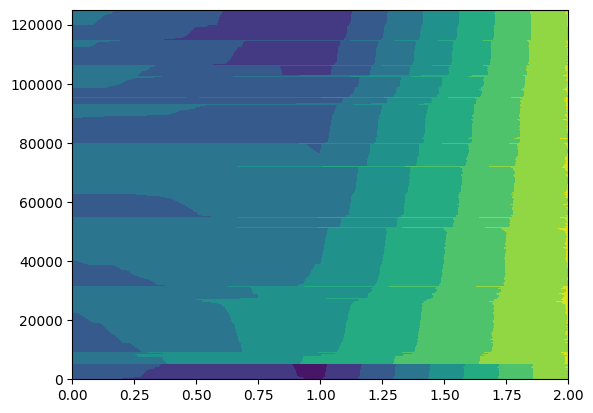

In [69]:
cs = plt.contourf(ds1)